# Machine Learning Project
### Designing algorithm to identfy True and Fake news using Natural Language Processing Tools

# Introduction

After taking the Data Science course from BrainStation, I learned how powerful python and its libraries in data analysis, prediction and visualization. In order to strengen my skills in algorithm and pipeline development, I decided to take a step further to continue and deep dive into Machine Learning. 

Currently I am at the 3rd week of the course and planning on my project, it took me a while to decide a topic as I tried to avoid applying repetitive skills I mastered in Data Science course. Throughout readings I learned that there are various stages of Data Science and Machine Learning:

 - Data collection
 - Data sorting
 - Data analysis
 - Algorithm development
 - Apply and optimize algorithm
 - Utilize the results geneterated from the algorithm to provide insights and further conclusions

In order to apply all the above skills and use all sort of machine learning APIs more extensively including NLPT, sci-kit learn, TensorFlow and Keras to build an algorithm and pipeline, and I will deploy the ML model to real-time data in Google Cloud Platform. I have done research and read feedback on suggested projects for ML beginners, and decided to proceed with analayzing True and Fake news based on Natural Language Tools. Data was taken from Kaggle and the project is in progress. 

Throughout the process of getting idea how to Natural Language Processing and Text Analytics, I found the following articles and guidelines are very helpful for beginners who are interested in learning NLTK:

**Medium:** https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

**Towards Data Science:** https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3

**Towards AI:** https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b

**Towards AI:** https://medium.com/towards-artificial-intelligence/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0 (highly recommend!)

**DataCamp:** https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk


I will constantly upload the noteboook for updates, so stay tuned!

#Data Collection

**Data Source:** Data is collected from Kaggle https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

There are 2 sets of data - **True.csv** and **Fake.csv**, which consists of ~20,000 and ~18,000 articles, respectively. Each dataset contains the following information:

 - Article Title
 - Article Test
 - Article Subject
 - Article published date

Data was cleaned and uploaded to Kaggle by the creator prior to downloading for analysis and data modeling

**Note**

This notebook has run on both local computer and in google server, the data size was too large and articles length were extremely long, it was too computational heavy for NLP and it kept crashing the sever. Therefore I decided to reduce the sample size to 50%.



In [1]:
# Mount the drive in order to access the file as we would locally
# The dataset is too large and getting computational heavy, therefore the analysis was done in google cloud instead of locally
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Import Libraries and Data

In [2]:
# import libraries
# more libraries will be imported as I go

# libraries for data processing and data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# visual representation of text data
from wordcloud import WordCloud, STOPWORDS

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# Removing stopwords
from nltk.corpus import stopwords 

# Stemming and Lemmatizing words in the dataframe
# https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Text Cleaning
# Importing string for cleaning string, punctuations, numbers
import string

# Vectorizing Imports
# Importing CountVectorizer to tokenize our articles
# https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be
from sklearn import feature_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# libraries for machine learning
# Importing Scaler for Standardizing Data
from sklearn.preprocessing import StandardScaler

# Train and Test splits prior to data modelling
from sklearn.model_selection import train_test_split

# Importing the different models for modelling purposes
# Supervised ML
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.svm import LinearSVC #Linear SVM
from sklearn.svm import SVC #Kernal SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Unsupervised ML
from sklearn import cluster #Kmeans clustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE #tSNE
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import AdaBoostClassifier

# Model Scoring and Validation
from sklearn import metrics # Metrics for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For saving models
import joblib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import data
true = pd.read_csv("/content/gdrive/My Drive/Brainstation/Machine Learning/Project/data/True.csv")
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [4]:
# import data
fake = pd.read_csv("/content/gdrive/My Drive/Brainstation/Machine Learning/Project/data/Fake.csv")
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Exploratory data analysis

In [6]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


#### Create a copy of both DataFrames to avoid changes of the original DataFrames, followed by exploring DataFrames details

In [7]:
# As mentioned in the beginning, dataset is too large and causing issue in the analysis, as such only 50% data will be used
df_true = true.sample(frac = .50).copy() 
df_fake = fake.sample(frac = .50).copy() 

In [8]:
#df_true = true.copy()

In [8]:
# check True dataframe info after trimming
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10708 entries, 18978 to 19980
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10708 non-null  object
 1   text     10708 non-null  object
 2   subject  10708 non-null  object
 3   date     10708 non-null  object
dtypes: object(4)
memory usage: 418.3+ KB


In [9]:
df_true.nunique()

title      10557
text       10655
subject        2
date         698
dtype: int64

In [10]:
df_true['subject'].unique()

array(['worldnews', 'politicsNews'], dtype=object)

In [11]:
#df_fake = fake.copy()

In [12]:
# check Fake dataframe info after trimming
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11740 entries, 3530 to 10139
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    11740 non-null  object
 1   text     11740 non-null  object
 2   subject  11740 non-null  object
 3   date     11740 non-null  object
dtypes: object(4)
memory usage: 458.6+ KB


In [13]:
df_fake.nunique()

title      10261
text       10005
subject        6
date        1650
dtype: int64

In [14]:
df_fake['subject'].unique()

array(['News', 'left-news', 'politics', 'US_News', 'Middle-east',
       'Government News'], dtype=object)

#### Data cleanup on the subject column to make it more readible and for consistency

In [15]:
# change the content in subject column for consistency: create dictionary and assign to the column

# For Ture News
true_subject_clean = {'politicsNews' : 'Political News',
                        'worldnews' : 'World News'}

df_true['subject'] = df_true['subject'].map(true_subject_clean)

# For Fake News
fake_subject_clean = {'politics' : 'Political News',
                        'Government News' : 'Government News',
                        'News' : 'News',
                        'left-news' : 'Left News',
                        'US_News' : 'US News',
                        'Middle-east' : 'Middle Eastern News'}

df_fake['subject'] = df_fake['subject'].map(fake_subject_clean)

#### Data cleanup to check duplicates and drop if any

In [16]:
df_true.duplicated().sum()

49

In [17]:
df_fake.duplicated().sum()

3

#### Add "category" to True and Fake DataFrame, this will be used for categorization and classification in data modelling

In [18]:
# add new column "label", True will be 1, and Fake will be 0

df_true['category'] = 1
df_fake['category'] = 0

In [19]:
data_true = df_true.copy()
data_fake = df_fake.copy()

In [20]:
data_true['True/Fake'] = 'True'
data_fake['True/Fake'] = 'Fake'

In [21]:
data_true.head()

,title,text,subject,date,category,True/Fake
18978,Angola’s first new president in 38 years vows ...,LUANDA (Reuters) - Angola s first new presiden...,World News,"September 26, 2017",1,True
10689,Pennsylvania governor Wolf has 'treatable' pro...,(Reuters) - Pennsylvania Governor Tom Wolf ann...,Political News,"February 24, 2016",1,True
20072,U.S.-backed forces not planning on entering De...,WASHINGTON (Reuters) - U.S.-backed militias fi...,World News,"September 14, 2017",1,True
19239,U.S. bombers fly off North Korea's coast in sh...,WASHINGTON (Reuters) - U.S. Air Force B-1B Lan...,World News,"September 23, 2017",1,True
6476,Factbox: U.S. intel report on Russian cyber at...,(Reuters) - A declassified report by U.S. inte...,Political News,"January 6, 2017",1,True


In [22]:
data_fake.head()

,title,text,subject,date,category,True/Fake
3530,"NOTHING About Those 50,000 Jobs From Japan Is...","For the second time in as many weeks, Trump s ...",News,"December 7, 2016",0,Fake
21533,BREAKING: LA SHOOTER ADMITTED HE WAS OBAMA SUP...,Another horrible story about a deranged killer...,Left News,"Jul 24, 2015",0,Fake
8532,POLL: Bristol Palin Wants To Know Whose Voice...,Bristol Palin had something to say and pondere...,News,"January 26, 2016",0,Fake
10292,LT COL TONY SHAFFER: Muslim DNC IT Staffers Se...,Lt. Col. Tony Shaffer opened a can of worms to...,Political News,"Jul 28, 2017",0,Fake
22270,Trump Conducts Sting Operation on US Intellige...,21st Century Wire says Trump claims that after...,US News,"January 16, 2017",0,Fake


In [23]:
# concat and create a new DataFrame for both df_true and df_fake

df_tf = pd.concat([data_true, data_fake])
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22448 entries, 18978 to 10139
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      22448 non-null  object
 1   text       22448 non-null  object
 2   subject    22448 non-null  object
 3   date       22448 non-null  object
 4   category   22448 non-null  int64 
 5   True/Fake  22448 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [24]:
df_tf.head()

,title,text,subject,date,category,True/Fake
18978,Angola’s first new president in 38 years vows ...,LUANDA (Reuters) - Angola s first new presiden...,World News,"September 26, 2017",1,True
10689,Pennsylvania governor Wolf has 'treatable' pro...,(Reuters) - Pennsylvania Governor Tom Wolf ann...,Political News,"February 24, 2016",1,True
20072,U.S.-backed forces not planning on entering De...,WASHINGTON (Reuters) - U.S.-backed militias fi...,World News,"September 14, 2017",1,True
19239,U.S. bombers fly off North Korea's coast in sh...,WASHINGTON (Reuters) - U.S. Air Force B-1B Lan...,World News,"September 23, 2017",1,True
6476,Factbox: U.S. intel report on Russian cyber at...,(Reuters) - A declassified report by U.S. inte...,Political News,"January 6, 2017",1,True


In [25]:
# Recall: True = 1, Fake = 0
df_tf.category.value_counts()

0    11740
1    10708
Name: category, dtype: int64

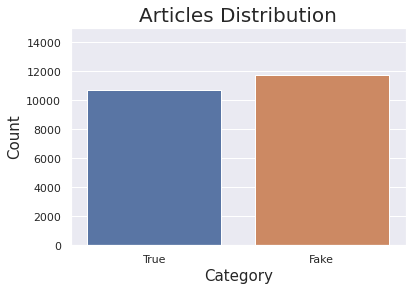

In [26]:
# To check if there is imbalance data for both True and Fake new data sets
# This is to ensure data are well balacned to avoid skewing analysis and algorithm training
sns.countplot(x='True/Fake', data=df_tf)#color='#597FE7')
plt.title('Articles Distribution',fontsize = 20)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 15000]);

In [27]:
df_tf.subject.value_counts()

Political News         9083
World News             5067
News                   4520
Left News              2217
Government News         767
Middle Eastern News     403
US News                 391
Name: subject, dtype: int64

In [28]:
df_true.subject.value_counts()

Political News    5641
World News        5067
Name: subject, dtype: int64

In [29]:
df_fake.subject.value_counts()

News                   4520
Political News         3442
Left News              2217
Government News         767
Middle Eastern News     403
US News                 391
Name: subject, dtype: int64

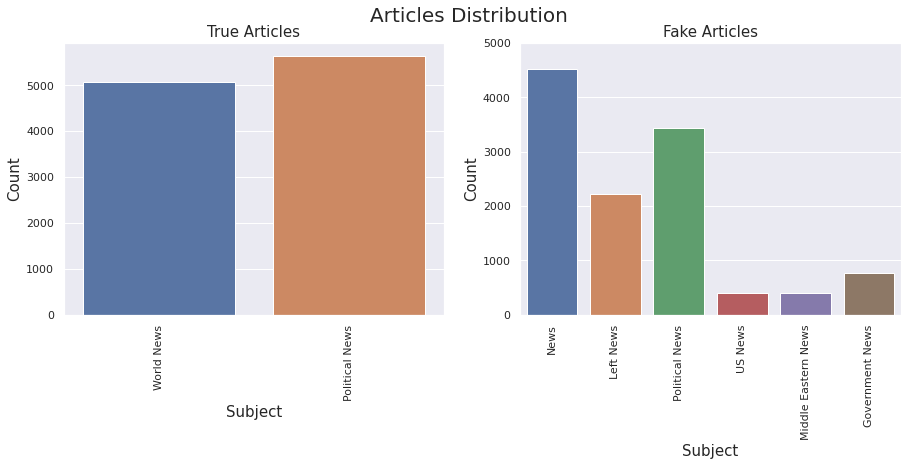

In [30]:
plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Articles Distribution', fontsize = 20)

plt.subplot(1,2,1)
sns.countplot(x='subject', data=df_true) #color='#597FE7')
plt.title('True Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
#plt.ylim([0, 12000])

plt.subplot(1,2,2)
sns.countplot(x='subject', data=df_fake) #color='#597FE7')
plt.title('Fake Articles',fontsize = 15)
plt.xlabel('Subject',fontsize = 15)
plt.xticks(rotation='90')
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 5000]);


## Data Pre-processing with NLTK for text cleaning (Natural Language Tools)

**Uppercase and Lowercase conversion**

It is to convert the entire text to either lowercase or uppercase to unify the same words or phrases. This step will help the algorithm to treat the same words in different cases as different.

**Tokenization**
This is a process to convert normal text strings into a list of tokens. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

**Stopwords**

Stopwords are the English words which does not add much meaning to a sentence, and that they can be filtered without sacrificing the meaning of the original sentences. Words or punctuation such as 'the', 'he' or 'have' will be excluded. This step is usually done before or after processing of natural language data

**Stemming**

**Lemmatization**

For more information can look at this article: https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e

**WordCloud**

Word Cloud is a data visualization tool to represent the word frequency and importance based on the font size - it is a technique commonly used for analyzing text data from social media websites.

I used the following website to assist me in setting the syntax: https://www.geeksforgeeks.org/generating-word-cloud-python/

**To get a better sense of the common words that were seen or used in the News title and text**

note that I would like to do a WordCloud analysis of text as well, however it was computational heavy and I had a hard time running

In [31]:
# Uppercase and Lowercase conversion
# I will do a word count for column[text] to both True and Fake DataFrames

# Step 1 - Removing all punctuations
# Source: https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers
# Source: https://stackoverflow.com/questions/12851791/removing-numbers-from-string/12856384#12856384
df_true['text'] = df_true['text'].str.translate(str.maketrans('', '', string.digits))
df_fake['text'] = df_fake['text'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase
df_true['text'] = df_true['text'].str.lower()
df_fake['text'] = df_fake['text'].str.lower()

In [32]:
# Revisit Uppercase and Lowercase conversion
# I will also create a WordCloud for column[title] to both True and Fake DataFrames

# Step 1 - Removing all punctuations
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.punctuation))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.punctuation))

# Step 2 - Removing all numbers
df_true['title'] = df_true['title'].str.translate(str.maketrans('', '', string.digits))
df_fake['title'] = df_fake['title'].str.translate(str.maketrans('', '', string.digits))

# Step 3 - Converting all texts to lowercase
df_true['title'] = df_true['title'].str.lower()
df_fake['title'] = df_fake['title'].str.lower()

In [33]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_true.head()

,title,text,subject,date,category
18978,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,"September 26, 2017",1
10689,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,"February 24, 2016",1
20072,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,"September 14, 2017",1
19239,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,"September 23, 2017",1
6476,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,"January 6, 2017",1


In [34]:
# check DataFrame to ensure text are processed before proceeding to the next step
df_fake.head()

,title,text,subject,date,category
3530,nothing about those jobs from japan is what ...,for the second time in as many weeks trump s t...,News,"December 7, 2016",0
21533,breaking la shooter admitted he was obama supp...,another horrible story about a deranged killer...,Left News,"Jul 24, 2015",0
8532,poll bristol palin wants to know whose voice ...,bristol palin had something to say and pondere...,News,"January 26, 2016",0
10292,lt col tony shaffer muslim dnc it staffers sen...,lt col tony shaffer opened a can of worms toni...,Political News,"Jul 28, 2017",0
22270,trump conducts sting operation on us intellige...,st century wire says trump claims that after s...,US News,"January 16, 2017",0


In [35]:
# Confirmed changes were made in both DataFrames, next step is to do a word count for 'Title' and 'Text'
# This will help us to understand the # words would represent an article could be true or fake
# how to use lambda: https://realpython.com/python-lambda/
# can also use this as reference: https://www.youtube.com/watch?v=8zMpRzXxAcA

# Total words in the 'title' column in True articles 
df_true['Title Word Count'] = df_true['title'].apply(lambda x: len(x.split(' ')))

# Total words in the 'text' column in True articles 
df_true['Text Word Count'] = df_true['text'].apply(lambda x: len(x.split(' ')))

# Total words in the 'title' column in Fake articles 
df_fake['Title Word Count'] = df_fake['title'].apply(lambda x: len(x.split(' ')))

# Total words in the 'text' column in Fake articles 
df_fake['Text Word Count'] = df_fake['text'].apply(lambda x: len(x.split(' ')))


In [36]:
# Check DataFrame to ensure new columns are added
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
18978,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,"September 26, 2017",1,11,276
10689,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,"February 24, 2016",1,7,306
20072,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,"September 14, 2017",1,9,273
19239,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,"September 23, 2017",1,11,293
6476,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,"January 6, 2017",1,11,623


In [37]:
# Check DataFrame to ensure new columns are added
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
3530,nothing about those jobs from japan is what ...,for the second time in as many weeks trump s t...,News,"December 7, 2016",0,15,568
21533,breaking la shooter admitted he was obama supp...,another horrible story about a deranged killer...,Left News,"Jul 24, 2015",0,15,450
8532,poll bristol palin wants to know whose voice ...,bristol palin had something to say and pondere...,News,"January 26, 2016",0,20,400
10292,lt col tony shaffer muslim dnc it staffers sen...,lt col tony shaffer opened a can of worms toni...,Political News,"Jul 28, 2017",0,15,1362
22270,trump conducts sting operation on us intellige...,st century wire says trump claims that after s...,US News,"January 16, 2017",0,8,451


In [38]:
df_true.describe()

,category,Title Word Count,Text Word Count
count,10708.0,10708.000000,10708.000000
mean,1.0,9.957695,395.111972
std,0.0,1.701664,279.682084
min,1.0,4.000000,2.000000
25%,1.0,9.000000,150.000000
50%,1.0,10.000000,369.000000
75%,1.0,11.000000,542.000000
max,1.0,20.000000,5175.000000


In [39]:
df_fake.describe()

,category,Title Word Count,Text Word Count
count,11740.0,11740.000000,11740.000000
mean,0.0,15.118654,441.810477
std,0.0,4.241815,443.767852
min,0.0,1.000000,1.000000
25%,0.0,12.000000,245.000000
50%,0.0,15.000000,374.000000
75%,0.0,17.000000,520.000000
max,0.0,45.000000,8436.000000


In [40]:
# Print a summary for word counts we just performed
# Summary includes sum, mean, max and min
# https://realpython.com/python-print/
print()
print('----------- Summary -----------')
print()
print('Word count for Title column:')
print('----------------------------')
print(f"Sum wordcount of true articles titles: {df_true['Title Word Count'].sum()}") 
print(f"Sum wordcount of fake articles titles: {df_fake['Title Word Count'].sum()}") 
print()
print(f"Mean wordcount of true article titles: {df_true['Title Word Count'].mean()}")
print(f"Mean wordcount of fake articles titles: {df_fake['Title Word Count'].mean()}")
print()
print(f"Max wordcount of true article titles: {df_true['Title Word Count'].max()}")
print(f"Max wordcount of fake articles titles: {df_fake['Title Word Count'].max()}")
print()
print(f"Min wordcount of true article titles: {df_true['Title Word Count'].min()}")
print(f"Min wordcount of fake articles titles: {df_fake['Title Word Count'].min()}")
print()
print('Word count for Text column:')
print('----------------------------')
print(f"Sum wordcount of true articles titles: {df_true['Text Word Count'].sum()}") 
print(f"Sum wordcount of fake articles titles: {df_fake['Text Word Count'].sum()}") 
print()
print(f"Mean wordcount of true article titles: {df_true['Text Word Count'].mean()}")
print(f"Mean wordcount of fake articles titles: {df_fake['Text Word Count'].mean()}")
print()
print(f"Max wordcount of true article titles: {df_true['Text Word Count'].max()}")
print(f"Max wordcount of fake articles titles: {df_fake['Text Word Count'].max()}")
print()
print(f"Min wordcount of true article titles: {df_true['Text Word Count'].min()}")
print(f"Min wordcount of fake articles titles: {df_fake['Text Word Count'].min()}")
print()


----------- Summary -----------

Word count for Title column:
----------------------------
Sum wordcount of true articles titles: 106627
Sum wordcount of fake articles titles: 177493

Mean wordcount of true article titles: 9.957695181172955
Mean wordcount of fake articles titles: 15.118654173764906

Max wordcount of true article titles: 20
Max wordcount of fake articles titles: 45

Min wordcount of true article titles: 4
Min wordcount of fake articles titles: 1

Word count for Text column:
----------------------------
Sum wordcount of true articles titles: 4230859
Sum wordcount of fake articles titles: 5186855

Mean wordcount of true article titles: 395.1119723571162
Mean wordcount of fake articles titles: 441.8104770017036

Max wordcount of true article titles: 5175
Max wordcount of fake articles titles: 8436

Min wordcount of true article titles: 2
Min wordcount of fake articles titles: 1



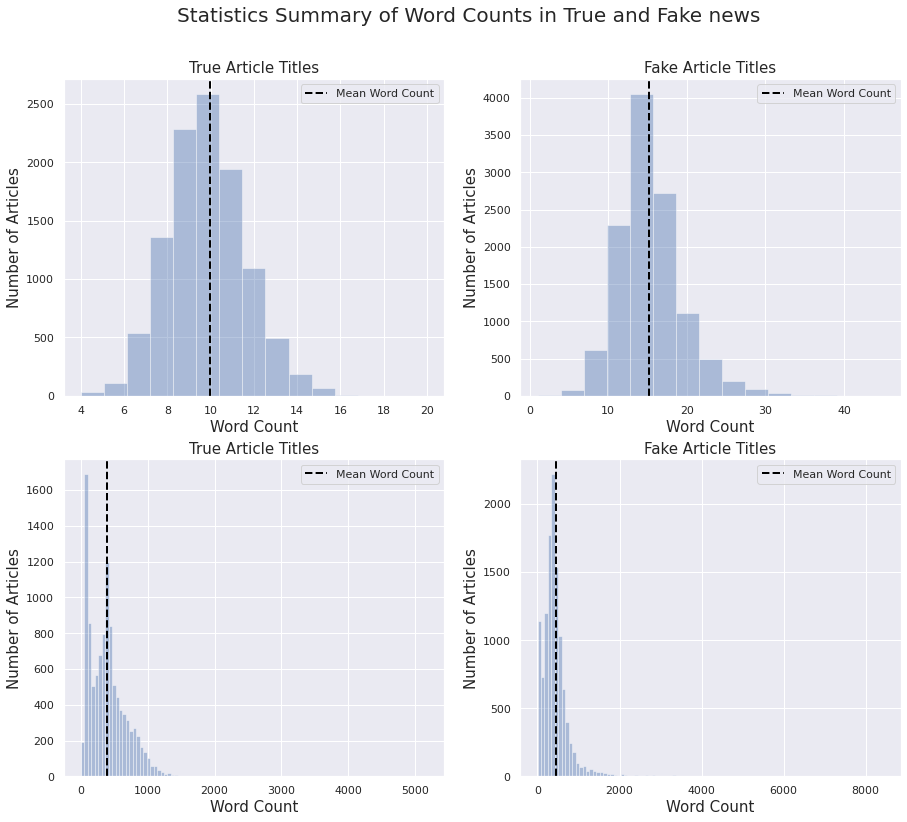

In [41]:
# Next step is to construct graphs using the above data for better visualization
plt.subplots(2,2, figsize = (15,12.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for True Article title word count
plt.subplot(2,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for False Article title word count
plt.subplot(2,2,2)
sns.distplot(df_fake['Title Word Count'], bins = 15, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,3)
sns.distplot(df_true['Text Word Count'], bins = 100, kde=False)
plt.title('True Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend()

# Plot graph for True Article Text word count
plt.subplot(2,2,4)
sns.distplot(df_fake['Text Word Count'], bins = 100, kde=False)
plt.title('Fake Article Titles',fontsize = 15)
plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count')
plt.legend();

In [42]:
#Based of the summary table and distribution graphs, majority of new articles
#Some lengthy articles could skewed the results for further algorithm development, therefore I need to set a threshold and eliminate some data
#tested 2500, 3000 and 3500 to find an optimal threshold

In [43]:
# Set threshold to drop articles that skewed the analysis for True Articles

print('Total articles that have words>2500 the text column:')
print(len(df_true[df_true['Text Word Count'] > 2500]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles will be elimiated:')
print(len(df_true[df_true['Text Word Count'] > 2500]) / len(df_true)*100)
print()

# Checking for all rows where Text Word Count is over 3000 
#print("The rows that'll be dropped are as follows:")
#print()
#display(df_true[df_true['Text Word Count'] > 2500])

Total articles that have words>2500 the text column:
3

Percent of true articles will be elimiated:
0.028016436309301458



In [44]:
# Set threshold to drop articles that skewed the analysis for Fake Articles

print('Total articles that have words >3000 the text column:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]))
print()

# Printing out the propotion to see how much of our data is outside of our distributions
print('Percent of true articles wull be eliminated:')
print(len(df_fake[df_fake['Text Word Count'] > 3000]) / len(df_fake)*100)
print()

# Checking for all rows where Text Word Count is over 3000 
#print("The rows that'll be dropped are as follows:")
#print()
#display(df_fake[df_fake['Text Word Count'] > 3000])

Total articles that have words >3000 the text column:
67

Percent of true articles wull be eliminated:
0.5706984667802385



In [45]:
# Drop data that are beyond the set threshold
df_true.drop(df_true[df_true['Text Word Count'] < 20].index, inplace = True)
df_true.drop(df_true[df_true['Text Word Count']>2500].index, inplace=True)
df_true.reset_index(drop = True, inplace = True)
df_true.describe()
df_true.duplicated().sum()

49

In [46]:
df_true.drop_duplicates(inplace = True)
df_true.duplicated().sum()

0

In [47]:
# reset index
df_true.reset_index(drop = True, inplace = True)
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,"September 26, 2017",1,11,276
1,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,"February 24, 2016",1,7,306
2,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,"September 14, 2017",1,9,273
3,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,"September 23, 2017",1,11,293
4,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,"January 6, 2017",1,11,623


In [48]:
# Drop data that are beyond the set threshold
df_fake.drop(df_fake[df_fake['Text Word Count']<20].index, inplace=True)
df_fake.drop(df_fake[df_fake['Text Word Count']>3000].index, inplace=True)
df_fake.reset_index(drop = True, inplace = True)
df_fake.describe()
df_fake.duplicated().sum()

3

In [49]:
df_fake.drop_duplicates(inplace = True)
df_fake.duplicated().sum()

0

In [50]:
df_fake.reset_index(drop = True, inplace = True)
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count
0,nothing about those jobs from japan is what ...,for the second time in as many weeks trump s t...,News,"December 7, 2016",0,15,568
1,breaking la shooter admitted he was obama supp...,another horrible story about a deranged killer...,Left News,"Jul 24, 2015",0,15,450
2,poll bristol palin wants to know whose voice ...,bristol palin had something to say and pondere...,News,"January 26, 2016",0,20,400
3,lt col tony shaffer muslim dnc it staffers sen...,lt col tony shaffer opened a can of worms toni...,Political News,"Jul 28, 2017",0,15,1362
4,trump conducts sting operation on us intellige...,st century wire says trump claims that after s...,US News,"January 16, 2017",0,8,451


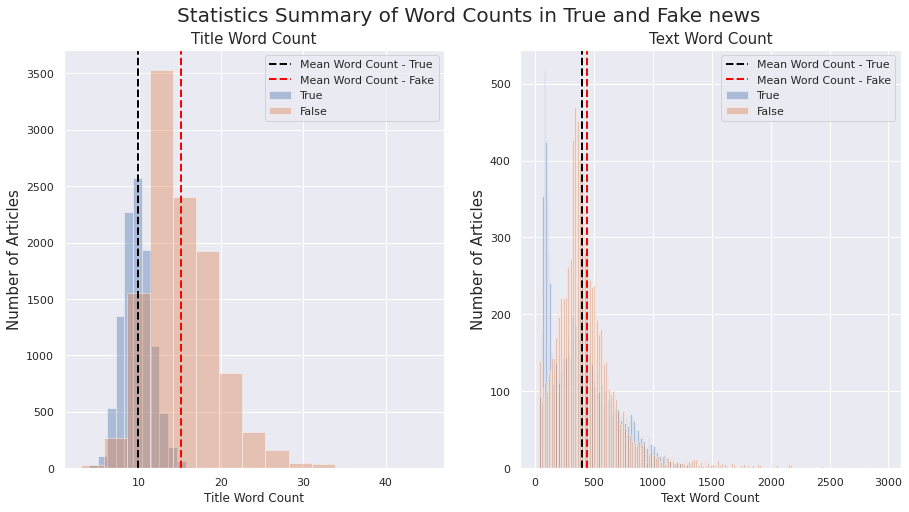

In [51]:
# After dropping the outliers and duplicated data, let's replot the distribution graph for visualization
plt.subplots(1,2, figsize = (15,7.5))
plt.subplots_adjust(top = 0.9)
plt.suptitle('Statistics Summary of Word Counts in True and Fake news', fontsize = 20)

# Plot graph for Title Word Count
plt.subplot(1,2,1)
sns.distplot(df_true['Title Word Count'], bins = 15, label = 'True', kde = False)
sns.distplot(df_fake['Title Word Count'], bins = 15, label = 'False', kde = False)
plt.title('Title Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Title Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend()

# Plot graph for Text Word Count
plt.subplot(1,2,2)
sns.distplot(df_true['Text Word Count'], bins = 200, label = 'True', kde = False)
sns.distplot(df_fake['Text Word Count'], bins = 200, label = 'False', kde = False)
plt.title('Text Word Count',fontsize = 15)
#plt.xlabel('Word Count',fontsize = 15)
plt.ylabel('Number of Articles',fontsize = 15)
plt.axvline(x=df_true['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'black', label = 'Mean Word Count - True')
plt.axvline(x=df_fake['Text Word Count'].mean(),
            linewidth = 2,
            linestyle = '--',
            color = 'red', label = 'Mean Word Count - Fake')
plt.legend();


In [53]:
# WordClouds for words in Titles for df_true
# Setting up or stopwords 
#%%time
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_true_title = ''

# Iterating over every word in our column
for word in df_true['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_true_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_true_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_true_title)

In [54]:
# WordClouds for words in Titles for df_fake
# Setting up or stopwords 
#%%time
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_fake_title = ''

# Iterating over every word in our column
for word in df_fake['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_fake_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_fake_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_fake_title)

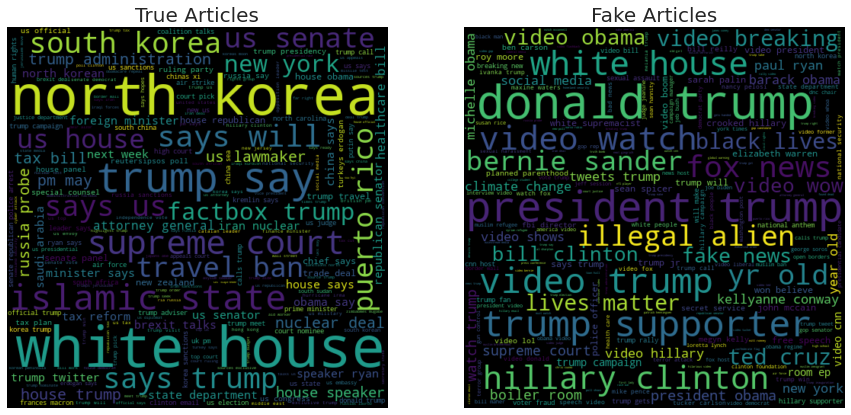

In [55]:
# plot the WordCloud image for News Title
# a good resource to guide doing subplot 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# https://python-graph-gallery.com/261-custom-python-wordcloud/

plt.subplots(1,2, figsize = (15,15))
plt.subplots_adjust(top = 0.9)
#plt.suptitle('Word Cloud for Articles Title', fontsize = 20)

# WordCloud for True News DataFrame
plt.subplot(1,2,1)
plt.imshow(wc_df_true_title, interpolation="bilinear")
plt.title('True Articles', fontsize = 20)
plt.axis('off')

# WordCloud for Fake News DataFrame
plt.subplot(1,2,2)
plt.imshow(wc_df_fake_title, interpolation="bilinear")
plt.title('Fake Articles', fontsize = 20)
plt.axis('off')

plt.show();

In [58]:
#print("Correctly clustered news: " + str((correct*100)/(correct+incorrect)) + "%")
#https://builtin.com/data-science/step-step-explanation-principal-component-analysis

### Articles published date analysis

In [56]:
# Converting date column data type from object to datetime
df_true['date'] = pd.to_datetime(df_true['date'])
df_fake['date'] = pd.to_datetime(df_fake['date'], errors = 'coerce')

# Converting date columns into year, month and day
# Extracting the year of publishing
df_true['Year'] = df_true['date'].dt.year
df_fake['Year'] = df_fake['date'].dt.year

# Extracting the month of the year
df_true['Month'] = df_true['date'].dt.month
df_fake['Month'] = df_fake['date'].dt.month

# Extracting the day of the month
df_true['Day'] = df_true['date'].dt.day
df_fake['Day'] = df_fake['date'].dt.day

In [57]:
# dataframe check
df_true.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,2017-09-26,1,11,276,2017,9,26
1,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,2016-02-24,1,7,306,2016,2,24
2,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,2017-09-14,1,9,273,2017,9,14
3,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,2017-09-23,1,11,293,2017,9,23
4,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,2017-01-06,1,11,623,2017,1,6


In [58]:
# data type check
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             10655 non-null  object        
 1   text              10655 non-null  object        
 2   subject           10655 non-null  object        
 3   date              10655 non-null  datetime64[ns]
 4   category          10655 non-null  int64         
 5   Title Word Count  10655 non-null  int64         
 6   Text Word Count   10655 non-null  int64         
 7   Year              10655 non-null  int64         
 8   Month             10655 non-null  int64         
 9   Day               10655 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 832.5+ KB


In [59]:
# Double check the true dataframe has no NA
df_true.isna().sum()

title               0
text                0
subject             0
date                0
category            0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

In [60]:
# dataframe check
df_fake.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,nothing about those jobs from japan is what ...,for the second time in as many weeks trump s t...,News,2016-12-07,0,15,568,2016,12,7
1,breaking la shooter admitted he was obama supp...,another horrible story about a deranged killer...,Left News,2015-07-24,0,15,450,2015,7,24
2,poll bristol palin wants to know whose voice ...,bristol palin had something to say and pondere...,News,2016-01-26,0,20,400,2016,1,26
3,lt col tony shaffer muslim dnc it staffers sen...,lt col tony shaffer opened a can of worms toni...,Political News,2017-07-28,0,15,1362,2017,7,28
4,trump conducts sting operation on us intellige...,st century wire says trump claims that after s...,US News,2017-01-16,0,8,451,2017,1,16


In [61]:
# data type check
# why year, month and day are float and not int?
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151 entries, 0 to 11150
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             11151 non-null  object        
 1   text              11151 non-null  object        
 2   subject           11151 non-null  object        
 3   date              11151 non-null  datetime64[ns]
 4   category          11151 non-null  int64         
 5   Title Word Count  11151 non-null  int64         
 6   Text Word Count   11151 non-null  int64         
 7   Year              11151 non-null  int64         
 8   Month             11151 non-null  int64         
 9   Day               11151 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 871.3+ KB


In [62]:
# Double check the fake dataframe has no NA
df_fake.isna().sum()

title               0
text                0
subject             0
date                0
category            0
Title Word Count    0
Text Word Count     0
Year                0
Month               0
Day                 0
dtype: int64

In [63]:
df_fake.describe()

,category,Title Word Count,Text Word Count,Year,Month,Day
count,11151.0,11151.000000,11151.000000,11151.000000,11151.000000,11151.000000
mean,0.0,15.151018,438.560039,2016.289481,6.273608,15.495292
std,0.0,4.202537,309.142372,0.648251,3.390917,8.736940
min,0.0,3.000000,20.000000,2015.000000,1.000000,1.000000
25%,0.0,12.000000,270.000000,2016.000000,3.000000,8.000000
50%,0.0,15.000000,383.000000,2016.000000,6.000000,15.000000
75%,0.0,17.000000,525.000000,2017.000000,9.000000,23.000000
max,0.0,45.000000,2957.000000,2018.000000,12.000000,31.000000


In [64]:
# Since there is null values in the Fake Dataframe, these empty data need to be filled
# Median would be the option to use based on the 50% percentile from the described table 

df_fake['Year'] = df_fake['Year'].fillna(df_fake['Year'].median())

df_fake['Month'] = df_fake['Month'].fillna(df_fake['Year'].median())

df_fake['Day'] = df_fake['Day'].fillna(df_fake['Day'].median())

In [65]:
# reset dataframe index
df_true.reset_index(drop = True, inplace = True)
df_fake.reset_index(drop = True, inplace = True)

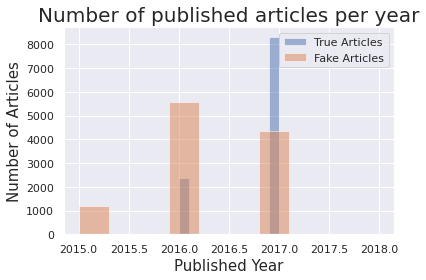

In [66]:
# Making our first subplot
plt.title('Number of published articles per year', fontsize = 20)
plt.hist(df_true['Year'], alpha = 0.5, label = 'True Articles')
plt.hist(df_fake['Year'], alpha = 0.5, label = 'Fake Articles')
plt.xlabel('Published Year', fontsize = 15)
plt.ylabel('Number of Articles', fontsize = 15)
plt.legend()
plt.tight_layout()
plt.show()

### Tokenization

Next step I would like compare the top 30 words used in the True and Fake News dataset, information will be extracted and put together in a DataFrame. 

To understand more about vectorization:

- **Towards Data Science:** https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e

- **Kaggle:** https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

Here is a good examples of how to setup the syntax:

- **Stack overflow:** https://stackoverflow.com/questions/55994883/how-to-use-countvectorizer-to-test-new-data-after-doing-some-training

In [67]:
%%time 
# Setting up our variables
true_text = df_true['text']
fake_text = df_fake['text']

# Call for the vectorizer model
vect_true = CountVectorizer(stop_words = 'english')
vect_fake = CountVectorizer(stop_words = 'english')

# Fit and transform the Vectorizer for the two data set
# side note to myself: always set variable for 'fit_transform'
true_text = vect_true.fit_transform(true_text)
fake_text = vect_fake.fit_transform(fake_text)

#vect_true.fit(true_text)
#vect_fake.fit(fake_text)

#print('Time taken to vectorize:')

CPU times: user 5.54 s, sys: 3.35 ms, total: 5.54 s
Wall time: 5.55 s


After vectorization, I would like to place the output DataFrame side-by-side for comparison. Here is a good example for further instructions:

**Stack overflow:** https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [68]:
# Exact and conclude results in a DataFrame format
df_vect_true = pd.DataFrame(columns=vect_true.get_feature_names(), data=true_text.toarray())

In [69]:
df_vect_fake = pd.DataFrame(columns=vect_fake.get_feature_names(), data=fake_text.toarray())

In [70]:
# Create word count variable
word_count = 30

# Create dataframe and adds up across axis 0 to get the count of words
df_true_wordcount = pd.DataFrame(df_vect_true.sum(axis = 0).reset_index())
df_fake_wordcount = pd.DataFrame(df_vect_fake.sum(axis = 0).reset_index())

# Rename the columns
df_true_wordcount.columns = ['Word', 'Word Count']
df_fake_wordcount.columns = ['Word', 'Word Count']

# Reset the index for this new dataframe
df_true_wordcount.reset_index(inplace = True, drop = True)
df_fake_wordcount.reset_index(inplace = True, drop = True)

# Getting the top 20 words in a descending order
top_30_true = df_true_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)
top_30_fake = df_fake_wordcount.sort_values(by = 'Word Count', ascending = False).head(word_count)

# Getting the bottom 20 words for both
#bottom_30_true = true_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)
#bottom_30_fake = fake_word_count_df.sort_values(by = 'Word Count', ascending = True).head(20)

In [71]:
from IPython.display import display_html
# Defining function
def display(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    

# Display the 2 DataFrame side-by-side for comparision
display(top_30_true, top_30_fake)

,Word,Word Count
43775,said,49369
51878,trump,27336
42422,reuters,14157
38991,president,13136
47872,state,9904
20503,government,9020
33845,new,8423
47927,states,8305
23058,house,8215
52997,united,7792


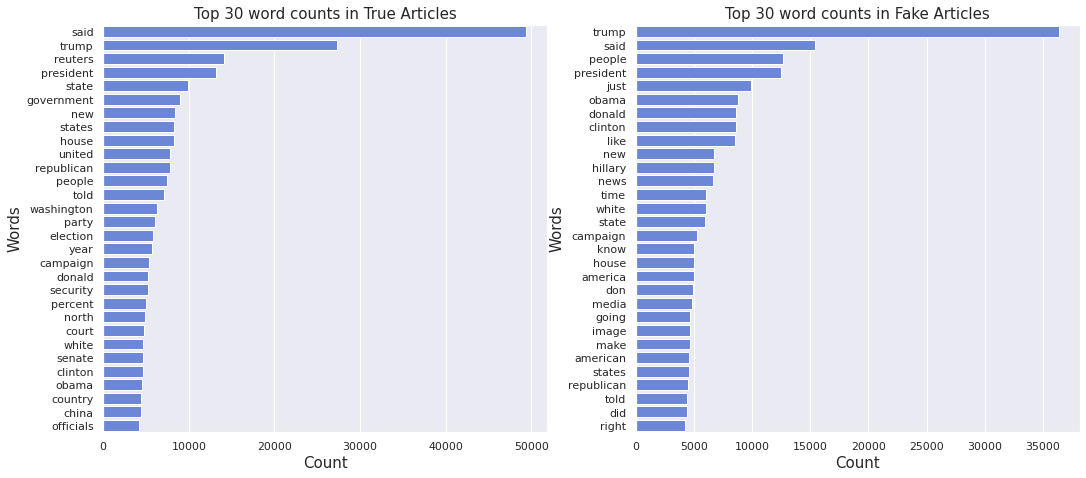

In [72]:
# To Summarize the two DataFrame into a histograph
plt.subplots(1,2, figsize = (17.5,7.5))

plt.subplot(1,2,1)
sns.barplot(x='Word Count', y='Word', data=top_30_true, color='#597FE7')
plt.title('Top 30 word counts in True Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x='Word Count', y='Word', data=top_30_fake, color='#597FE7')
plt.title('Top 30 word counts in Fake Articles',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

In [73]:
# To create a new stopwords list, I compare the above 2 charts for overlapped words and added to the stopwords list
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwordslist = list(stopwords)
stopwordslist.extend(('said','trump','reuters','president','state','government','states','new','house','united',
                       'clinton','obama','donald','like','news','just', 'campaign', 'washington', 'election',
                        'party', 'republican', 'image', 'just', 'states'))

# Chck if the words were added to the list
print(stopwordslist)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [74]:
df_true['category'] = 1
df_fake['category'] = 0

In [75]:
concat_tf = pd.concat([df_true, df_fake])
concat_tf.reset_index(drop = True, inplace = True)
concat_tf.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,2017-09-26,1,11,276,2017,9,26
1,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,2016-02-24,1,7,306,2016,2,24
2,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,2017-09-14,1,9,273,2017,9,14
3,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,2017-09-23,1,11,293,2017,9,23
4,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,2017-01-06,1,11,623,2017,1,6


In [76]:
concat_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21806 entries, 0 to 21805
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             21806 non-null  object        
 1   text              21806 non-null  object        
 2   subject           21806 non-null  object        
 3   date              21806 non-null  datetime64[ns]
 4   category          21806 non-null  int64         
 5   Title Word Count  21806 non-null  int64         
 6   Text Word Count   21806 non-null  int64         
 7   Year              21806 non-null  int64         
 8   Month             21806 non-null  int64         
 9   Day               21806 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 1.7+ MB


In [77]:
concat_tf.shape

(21806, 10)

In [ ]:
# save new CSV data file
#concat_tf.to_csv('data/concat_tf.csv')

To summarize, the following changes have been made on my dataset before moving forward:

1. Dropped duplicated data
2. Fill in missing data based on the DataFrame description
3. Rename subject column
4. Ensure the data in both data sets are balanced
5. Performed analyses including news subject distribution and date published distribution
6. Analysed, visualized and compared Top words used in the articles Title and Text
7. Categorized True and Fake news to 1 and 0, respectively
8. Combined dataframe for further analysis and data modelling
9. Create a new CSV file for the cleaned data

# Vectorization

As mentioned in the beginning, I would recommend the following article for grasp the idea of vectorization.

**Towards AI:** https://medium.com/towards-artificial-intelligence/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0#2847

**KDNuggets:** https://www.kdnuggets.com/2018/08/wtf-tf-idf.html

In [78]:
# There are various stemming algorithm out there.
# Here I picked Porter's Stemmer as it produces the best output while has the lowest error rate

# Create new variable (see above)
wordlist = stopwordslist

# Create tokenizer to clean data using stemmer
stemmer = PorterStemmer()

def stemming_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
        
    # Create a list to hold stemmed words
    listofstemmed_words = []
    
    for word in listofwords:
        if (not word in wordlist) and (word != ''):
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
            
    return listofstemmed_words

In [79]:
# Creat tokenizer to clean data using lemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization_tokenizer(text):
    
    for word in text:
        listofwords = text.split(' ')
    
    # Create a list to hold the lemmatized words
    listoflemmatized_words = []
    
    
    for word in listofwords:
        if (not word in wordlist) and (word != ''):
            lemmatized_word = lemmatizer.lemmatize(word)
            listoflemmatized_words.append(lemmatized_word)
            
    return listoflemmatized_words

In [80]:
# recap DataFrame
concat_tf.head()

,title,text,subject,date,category,Title Word Count,Text Word Count,Year,Month,Day
0,angola’s first new president in years vows to...,luanda reuters angola s first new president i...,World News,2017-09-26,1,11,276,2017,9,26
1,pennsylvania governor wolf has treatable prost...,reuters pennsylvania governor tom wolf announ...,Political News,2016-02-24,1,7,306,2016,2,24
2,usbacked forces not planning on entering deir ...,washington reuters usbacked militias fighting...,World News,2017-09-14,1,9,273,2017,9,14
3,us bombers fly off north koreas coast in show ...,washington reuters us air force bb lancer bom...,World News,2017-09-23,1,11,293,2017,9,23
4,factbox us intel report on russian cyber attac...,reuters a declassified report by us intellige...,Political News,2017-01-06,1,11,623,2017,1,6


**To define the DataFrame and setup variables to perform training and testing split for the models:**

In [81]:
# To setup my training model (train_test_split), I will first create variables for features (X) and targets (y)
# https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

# Create model objects:
# Create features
X = concat_tf['text']

# Create targets
y = concat_tf['category']

# Create train_test_split model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

**Based on the above articles I suggested above, Vectorization the data using, Count Vecotrizer, Bag of Words model and TF-IDF model would give us the most ideal results and depiction of articles**

Before setting the algorithm for Count Vectorizer, I re-visited the sklearn API to determine the parameters I should use:

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

- **```tokenizer```** as **stemming_tokenizer** 
- **```tokenizer```** as **lemmatization_tokenizer** 
- **``min_df``** as 500
- **``stopwords``** as 'english' and 'wordlist' (see above settings)

##Bag fo Words

### 1. Simple Vectorization
**Use only min_df and stopwords with a Count Vectorizer**

In [82]:
%%time
# Create model
vectorizer = CountVectorizer(min_df = 500, stop_words = 'english')

# Fit and transform data for X_train
X_train_vectorizer = vectorizer.fit_transform(X_train)

# Transform data for test
X_test_vectorizer = vectorizer.transform(X_test)


CPU times: user 5.35 s, sys: 60.1 ms, total: 5.41 s
Wall time: 5.42 s


In [83]:
# Transform the information in to DataFrame for visualization
df_vectorizer = pd.DataFrame(columns=vectorizer.get_feature_names(), data=X_train_vectorizer.toarray())
df_vectorizer.head()

,ability,able,absolutely,accept,access,according,account,accusations,accused,act,action,actions,activists,actually,added,adding,addition,additional,address,administration,adviser,affairs,agencies,agency,agenda,ago,agree,agreed,agreement,ahead,aid,aimed,air,al,allegations,alleged,allies,allow,allowed,allowing,...,water,way,ways,weapons,website,wednesday,week,weekend,weeks,went,west,western,white,wife,willing,win,winning,wire,woman,women,won,word,words,work,worked,workers,working,world,worse,worst,worth,wouldn,wrong,wrote,year,yearold,years,yes,york,young
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0


In [84]:
# Create new dataframe and count words after tokenizing
df_bow_wc = pd.DataFrame(df_vectorizer.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_bow_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
824,said,51749
978,trump,50944
698,president,20512
664,people,16086
906,state,12714
612,new,12118
802,reuters,11474
279,donald,11084
626,obama,10634
424,house,10512


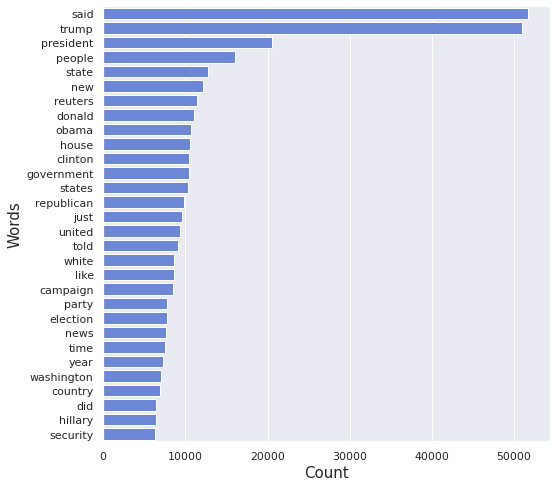

In [85]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_wc_data = df_bow_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

### 2. Vectorization using Bag of Words model and stemming


In [86]:
%%time
# Instantiating the Vectorizer 
bow_stemming = CountVectorizer(min_df = 500, tokenizer = stemming_tokenizer)

# Fit and transform X_train
X_train_bow_stemmed = bow_stemming.fit_transform(X_train)

# Transform X_test
X_test_bow_stemmed = bow_stemming.transform(X_test)


CPU times: user 23min 42s, sys: 75.7 ms, total: 23min 42s
Wall time: 23min 42s


In [87]:
# Transform the information into DataFrame for visualization
df_bow_stemming = pd.DataFrame(columns=bow_stemming.get_feature_names(), data=X_train_bow_stemmed.toarray())
df_bow_stemming.head()

,abil,abl,absolut,abus,accept,access,accord,account,accus,achiev,acknowledg,across,act,action,activ,activist,actual,ad,addit,address,administr,admit,advanc,advis,advoc,affair,affect,afford,age,agenc,agenda,agent,aggress,ago,agre,agreement,ahead,aid,aim,air,...,well,went,west,western,whether,white,whole,whose,wide,wife,will,win,wire,within,without,woman,women,wonder,word,work,worker,world,worri,wors,worst,worth,would,write,wrong,wrote,ye,year,yearold,yet,york,young,“a,“i,“the,“we
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,5,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0


In [88]:
# Create new dataframe and count words after tokenizing
df_bow_stem_wc = pd.DataFrame(df_bow_stemming.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_stem_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_stem_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_bow_stem_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
1074,us,24413
1137,would,21502
732,peopl,15891
892,say,14277
702,one,14190
1142,year,13148
47,also,12074
852,report,11111
279,democrat,10932
1035,time,10482


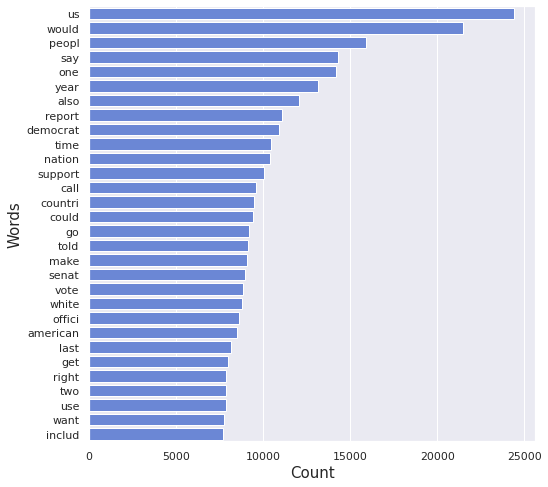

In [89]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_stem_wc_data = df_bow_stem_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_stem_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

### 3. Vectorization using Bag of Words model and lemmatization

In [90]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [91]:
%%time
# Instantiating the Vectorizer 
bow_lemmatization = CountVectorizer(min_df = 500, tokenizer = lemmatization_tokenizer)

# Fit and Transform X_train
X_train_bow_lemmatization = bow_lemmatization.fit_transform(X_train)

# Transform X_test
X_test_bow_lemmatization = bow_lemmatization.transform(X_test)


CPU times: user 22min 41s, sys: 3.12 s, total: 22min 44s
Wall time: 22min 44s


In [93]:
# Transform the information into DataFrame for visualization
df_bow_lemmatization = pd.DataFrame(columns=bow_lemmatization.get_feature_names(), data=X_train_bow_lemmatization.toarray())
df_bow_lemmatization.head()

,ability,able,absolutely,accept,access,according,account,accusation,accused,across,act,action,activist,activity,actually,added,adding,addition,additional,address,administration,adviser,affair,agency,agenda,agent,ago,agree,agreed,agreement,ahead,aid,aide,aimed,air,al,allegation,alleged,allow,allowed,...,wednesday,week,weekend,well,went,west,western,whether,white,whole,whose,wife,willing,win,winning,wire,within,without,woman,word,work,worked,worker,working,world,worse,worst,worth,would,wrong,wrote,year,yearold,yes,yet,york,young,“i,“the,“we
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0


In [94]:
# Create new dataframe and count words after tokenizing
df_bow_lemm_wc = pd.DataFrame(df_bow_lemmatization.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_bow_lemm_wc.columns = ['Word', 'Word Count']

# Reset index
df_bow_lemm_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_bow_lemm_wc.sort_values(by = 'Word Count', ascending = False).head(30)

,Word,Word Count
1043,u,24554
1112,would,21502
706,people,15891
677,one,14190
1115,year,13148
45,also,12074
1014,time,10249
868,say,9975
228,country,9506
226,could,9430


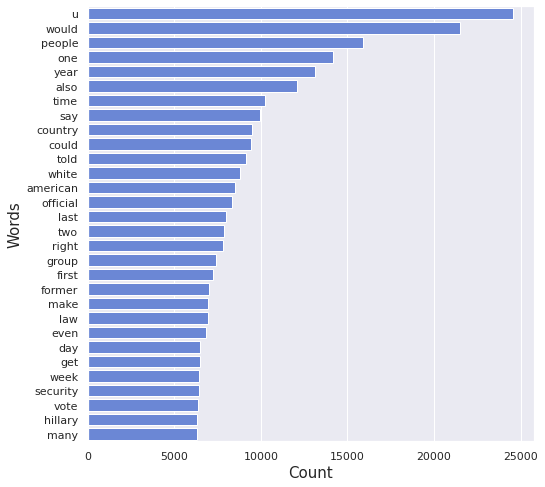

In [95]:
# To summarize the above table in a barplot
# 'bow' stands for bag of words

plt.figure(figsize=(8,8))
df_bow_lemm_wc_data = df_bow_lemm_wc.sort_values(by = 'Word Count', ascending=False).iloc[0:30]
sns.barplot(x='Word Count', y='Word', data=df_bow_lemm_wc_data, color='#597FE7')
plt.xlabel('Count',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

###Summarizing Bag of Words Model

In [96]:
# Summarizing all tables with the list of words generated from Bag of Words Model
# Create new table with reset index and showed only the top 30 words
#display(df_bow_wc, df_bow_stem_wc, df_bow_lemm_wc)

## TF-IDF Model

###Simple TF-IDP Vectorizer
**Use min_df=500 and stopwords=english with a TF-IDF Vectorizer**

In [97]:
%%time
# Create model
tfidf_vectorizer = TfidfVectorizer(min_df = 500, stop_words = 'english')

# Fit and transform data for X_train
X_train_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)

# Transform data for test
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)


CPU times: user 5.48 s, sys: 43 ms, total: 5.52 s
Wall time: 5.53 s


In [98]:
# Transform the information into DataFrame for visualization
df_tfidf = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names(), data=X_train_tfidf_vectorizer.toarray())
df_tfidf.head()

,ability,able,absolutely,accept,access,according,account,accusations,accused,act,action,actions,activists,actually,added,adding,addition,additional,address,administration,adviser,affairs,agencies,agency,agenda,ago,agree,agreed,agreement,ahead,aid,aimed,air,al,allegations,alleged,allies,allow,allowed,allowing,...,water,way,ways,weapons,website,wednesday,week,weekend,weeks,went,west,western,white,wife,willing,win,winning,wire,woman,women,won,word,words,work,worked,workers,working,world,worse,worst,worth,wouldn,wrong,wrote,year,yearold,years,yes,york,young
0,0.0,0.151529,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.173759,0.000000,0.0,0.0,0.0,0.000000,0.179638,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148470,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.188024,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.062563,0.0,0.0,0.0,0.046993,0.0,0.0,0.0,0.060493,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049565,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.07763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.05069,0.070091,0.0,0.000000,0.000000,0.000000,0.0,0.079911,0.000000,0.072056,0.0,0.00000,0.0,0.043355,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.069705,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.103714,0.0,0.100364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090926,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.086655,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.25105,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.063482,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.053787,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.062629,0.0,0.052200,0.044154,0.069058,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.049234,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089096,0.176205,0.0,0.0,0.0,0.083512,0.0,0.0,0.00000,0.000000,0.0,0.042455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.165462,0.000000,0.0


In [100]:
# Create new dataframe and count words after tokenizing
df_tfidf_wc = pd.DataFrame(df_tfidf.sum(axis = 0).reset_index())

# Rename column from Word to Word Count
df_tfidf_wc.columns = ['Word', 'Word Weight']

# Reset index
df_tfidf_wc.reset_index(inplace = True, drop = True)

# Return top 30 words in dataframe
df_tfidf_wc.sort_values(by = 'Word Weight', ascending = False).head(30)

,Word,Word Weight
978,trump,1587.057349
824,said,1275.835458
698,president,678.443476
664,people,552.724881
165,clinton,501.368309
906,state,489.742736
626,obama,483.283622
802,reuters,472.994259
424,house,455.210368
612,new,436.392642


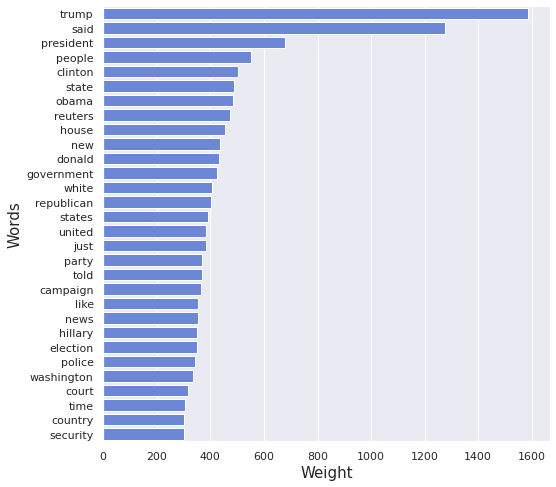

In [103]:
# To summarize the above table in a barplot

plt.figure(figsize=(8,8))
df_tfidf_wc_data = df_tfidf_wc.sort_values(by = 'Word Weight', ascending=False).iloc[0:30]
sns.barplot(x='Word Weight', y='Word', data=df_tfidf_wc_data, color='#597FE7')
plt.xlabel('Weight',fontsize = 15)
plt.ylabel('Words',fontsize = 15);

###Vectorization using TF-IDF model and stemming

In [104]:
%%time
# Instantiating the Vectorizer 
tfidf_stemming = TfidfVectorizer(min_df = 500, tokenizer = stemming_tokenizer)

# Fit and transform X_train
X_train_tfidf_stemmed = tfidf_stemming.fit_transform(X_train)

# Transform X_test
X_test_tfidf_stemmed = tfidf_stemming.transform(X_test)

CPU times: user 23min 38s, sys: 2.94 s, total: 23min 40s
Wall time: 23min 40s


In [105]:
# Transform the information into DataFrame for visualization
df_tfidf_stemming = pd.DataFrame(columns=tfidf_stemming.get_feature_names(), data=X_train_tfidf_stemmed.toarray())
df_tfidf_stemming.head()

,abil,abl,absolut,abus,accept,access,accord,account,accus,achiev,acknowledg,across,act,action,activ,activist,actual,ad,addit,address,administr,admit,advanc,advis,advoc,affair,affect,afford,age,agenc,agenda,agent,aggress,ago,agre,agreement,ahead,aid,aim,air,...,well,went,west,western,whether,white,whole,whose,wide,wife,will,win,wire,within,without,woman,women,wonder,word,work,worker,world,worri,wors,worst,worth,would,write,wrong,wrote,ye,year,yearold,yet,york,young,“a,“i,“the,“we
0,0.0,0.134856,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.13837,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.159564,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.122581,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.063920,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.059586,0.0,0.0,0.0,0.0,0.043641,0.0,0.0,0.00000,0.0,0.0,0.051461,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.046509,0.0,0.0,0.0,0.000000,0.0,0.0,0.150568,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0454,0.0,0.0,0.0,0.0,0.0,0.0,0.06152,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.078420,0.0,0.000000,0.0,0.000000,0.0,0.076109,0.028243,0.0,0.068769,0.0,0.000000,0.032845,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.062784,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.082736,0.0,0.092847,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.155840,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.056409,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.189009,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.047729,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.047448,0.000000,0.267058,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.070574,0.0,0.043009,0.0,0.066891,0.0,0.000000,0.025417,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.047334,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.05742,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.055684,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.203805,0.0,0.0,0.077713,0.0,0.0,0.0,0.0,0.029508,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.021255,0.0,0.000000,0.0,0.165523,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
